In [119]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [120]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    return res

In [121]:
def load_files(paths):
    frames = []
    for i in paths:
        print(i)
        frames.append(load_data(i))
    res = pd.concat(frames)
    return res

In [122]:
def gen_xy(df=None, colx='', coly='', ignore=True, limit=20):
    tg = df.groupby(colx)
    x = []
    y = []
    for k, v in tg[coly].apply(lambda _: np.average(_)).items():
        if ignore and tg.size()[int(k)] < limit:
            continue
        x.append(int(k))
        y.append(v)
    return x, y

In [123]:
styles = {}
styles["LVG"] = "ro-"
styles["interval heuristic"] = "g^-"
styles["target heuristic"] = "kx-"
styles["target heuristic call"] = "k*-"
styles["heuristic cost"] = "k^-"
styles["total cost"] = "cD-."
styles["polyanya"] = "bs-"
styles["poly-zero"] = "b+-"
styles["node push"] = "m|-"
plt.rcParams.update({'font.size': 14})
plt.rc('grid', linestyle="-.", color='gray')

def plot_graph(xlabel='', ylabel='', xs=[[]], ys=[[]], labels=[], color=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    n = len(xs)
    for i in range(n):
        x = xs[i]
        y = ys[i]
        if styles.get(labels[i]) is not None:
            #plt.scatter(x, y, marker=markers[labels[i]], color=colors[labels[i]])
            plt.plot(x, y, styles[labels[i]], label=labels[i])
            #ax.scatter(x, y, color=color)
            #ax.plot(x, y, label=labels[i], color=styles[labels[i]])
        else:
            ax.scatter(x, y)
            ax.plot(x, y, label=labels[i])
    ax.legend(labels)
    ax.legend(loc='best', fancybox=True, framealpha=0)
    plt.grid(True)


In [230]:
# load dense
paths0 = os.listdir('../outputs/s1/')
paths0 = ['../outputs/s1/' + i for i in paths0]
df0 = load_files(paths0)

# load sparse
paths1 = os.listdir('../outputs/s2/')
paths1 = ['../outputs/s2/' + i for i in paths1]
df1 = load_files(paths1)

../outputs/s1/9000-1.log
../outputs/s1/9000-2.log
../outputs/s1/9000-3.log
../outputs/s1/9000-7.log
../outputs/s1/9000-6.log
../outputs/s1/9000-4.log
../outputs/s1/9000-5.log
../outputs/s1/9000-15.log
../outputs/s1/9000-14.log
../outputs/s1/9000-10.log
../outputs/s1/9000-11.log
../outputs/s1/9000-13.log
../outputs/s1/9000-12.log
../outputs/s1/9000-8.log
../outputs/s1/9000-9.log
../outputs/s2/9000-2-1.log
../outputs/s2/9000-10-10.log
../outputs/s2/9000-15-9.log
../outputs/s2/9000-15-8.log
../outputs/s2/9000-6-1.log
../outputs/s2/9000-4-1.log
../outputs/s2/9000-3-1.log
../outputs/s2/9000-10-8.log
../outputs/s2/9000-10-9.log
../outputs/s2/9000-1-1.log
../outputs/s2/9000-5-1.log
../outputs/s2/9000-7-1.log
../outputs/s2/9000-10-1.log
../outputs/s2/9000-10-2.log
../outputs/s2/9000-9-1.log
../outputs/s2/9000-12-1.log
../outputs/s2/9000-10-3.log
../outputs/s2/9000-10-7.log
../outputs/s2/9000-10-6.log
../outputs/s2/9000-10-4.log
../outputs/s2/9000-10-5.log
../outputs/s2/9000-14-1.log
../outputs

# Experiment 1

* dense:  $|O|=9000, |T|=|O|, k=1$
* sparse: $|O|=9000, |T|=5, k=1$


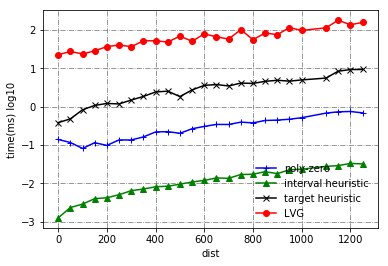

In [231]:
# dense: time
size = 50
limit = 10
df = df0.copy()
df = df[df.k == 1]
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'dist', 'cost_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'dist', 'cost_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'dist', 'cost_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'dist', 'cost_edbt', limit=limit)

for i in range(4):
    xs[i] = [v * size for v in xs[i]]
    ys[i] = [v / 1000 for v in ys[i]]
    ys[i] = np.log10(ys[i])
    
plot_graph('dist', 'time(ms) log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'LVG'])

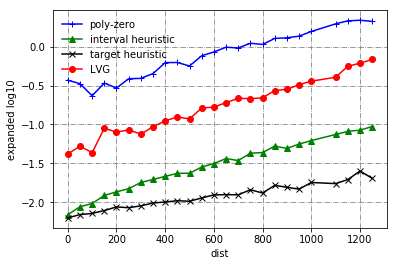

In [232]:
# dense: node expanded
size = 50
limit = 10
df = df0.copy()
df = df[df.k == 1]
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'dist', 'gen_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'dist', 'gen_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'dist', 'gen_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'dist', 'gen_edbt', limit=limit)

for i in range(4):
    xs[i] = [v * size for v in xs[i]]
    ys[i] = [v / 1000 for v in ys[i]]
    ys[i] = np.log10(ys[i])
    
plot_graph('dist', 'expanded log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'LVG'])

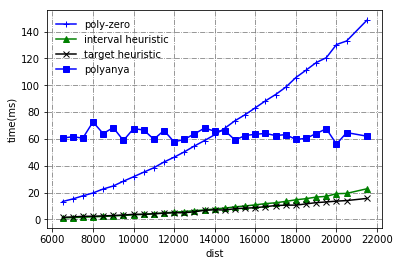

In [277]:
# sparse: time
limit = 200
size = 500
df = df1.copy()
df = df[df.k==1]
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'dist', 'cost_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'dist', 'cost_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'dist', 'cost_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'dist', 'cost_poly', limit=limit)

for i in range(4):
    xs[i] = [v * size for v in xs[i]]
    ys[i] = [v / 1000 for v in ys[i]]
    
plot_graph('dist', 'time(ms)', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'polyanya'])

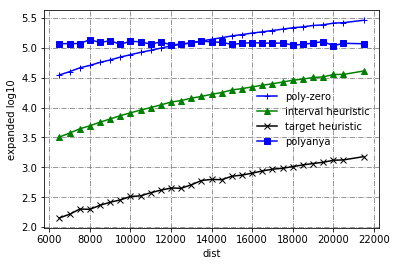

In [276]:
# sparse: time
limit= 200
size = 500
df = df1.copy()
df = df[df.k==1]
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'dist', 'gen_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'dist', 'gen_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'dist', 'gen_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'dist', 'gen_poly', limit=limit)

for i in range(4):
    xs[i] = [v * size for v in xs[i]]
    ys[i] = np.log10(ys[i])
plot_graph('dist', 'expanded log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'polyanya'])

## Experiment 2
* dense: $|O|=9000,|T|=|O|,k \in [1...10]$
* sparse: $|O|=9000,|T|=10,k \in [1...10]$

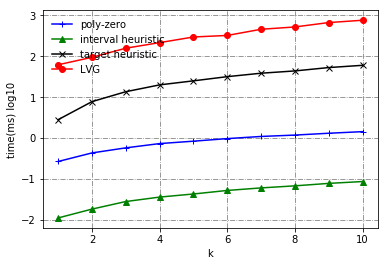

In [253]:
# dense: time

limit = 20
df = df0.copy()
df = df[(df.polys >= 8000) & (df.k <= 10)]
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'k', 'cost_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'k', 'cost_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'k', 'cost_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'k', 'cost_edbt', limit=limit)

for i in range(4):
    xs[i] = [v for v in xs[i]]
    ys[i] = [v / 1000 for v in ys[i]]
    ys[i] = np.log10(ys[i])
    
plot_graph('k', 'time(ms) log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'LVG'])

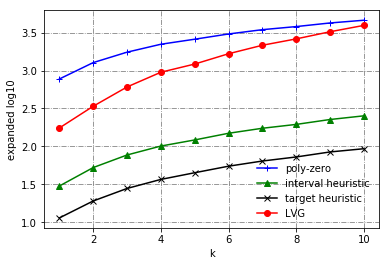

In [254]:
# dense: expanded

limit = 20
df = df0.copy()
df = df[(df.polys >= 8000) & (df.k <= 10)]
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'k', 'gen_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'k', 'gen_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'k', 'gen_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'k', 'gen_edbt', limit=limit)

for i in range(4):
    xs[i] = [v for v in xs[i]]
    ys[i] = np.log10(ys[i])
    
plot_graph('k', 'expanded log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'LVG'])

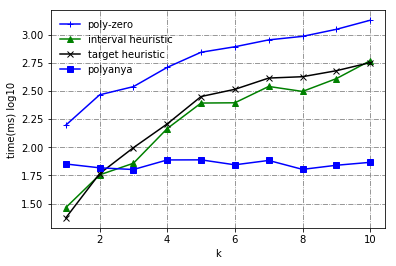

In [260]:
# sparse: time
limit= 20
df = df1.copy()
df = df[(df.polys>=8000) & (df.pts == 10)]
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'k', 'cost_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'k', 'cost_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'k', 'cost_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'k', 'cost_poly', limit=limit)

for i in range(4):
    xs[i] = [v for v in xs[i]]
    ys[i] = [v / 1000 for v in ys[i]]
    ys[i] = np.log10(ys[i])
plot_graph('k', 'time(ms) log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'polyanya'])

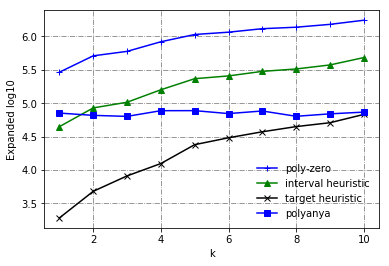

In [261]:
# sparse: expanded
limit= 20
df = df1.copy()
df = df[(df.polys>=8000) & (df.pts == 10)]
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'k', 'gen_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'k', 'gen_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'k', 'gen_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'k', 'cost_poly', limit=limit)

for i in range(4):
    xs[i] = [v for v in xs[i]]
    ys[i] = np.log10(ys[i])
plot_graph('k', 'Expanded log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'polyanya'])

# Experiment 3
* sparse: $|O|=9000,k=1,|T| \in [1,...10]$

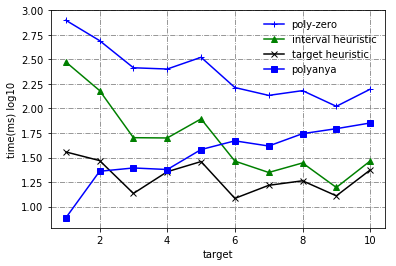

In [272]:
# sparse: time
limit= 20
df = df1.copy()
df = df[(df.polys>=8000) & (df.k == 1) & (df.pts <= 10)]
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'pts', 'cost_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'pts', 'cost_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'pts', 'cost_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'pts', 'cost_poly', limit=limit)

for i in range(4):
    xs[i] = [v for v in xs[i]]
    ys[i] = [v / 1000 for v in ys[i]]
    ys[i] = np.log10(ys[i])
plot_graph('target', 'time(ms) log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'polyanya'])

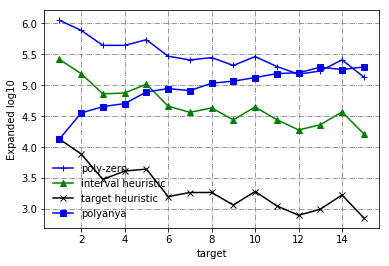

In [273]:
# sparse: expaned
limit= 20
df = df1.copy()
df = df[(df.polys>=8000) & (df.k == 1)]
xs = {}
ys = {}
xs[0], ys[0] = gen_xy(df, 'pts', 'gen_ki0', limit=limit)
xs[1], ys[1] = gen_xy(df, 'pts', 'gen_ki', limit=limit)
xs[2], ys[2] = gen_xy(df, 'pts', 'gen_hi', limit=limit)
xs[3], ys[3] = gen_xy(df, 'pts', 'gen_poly', limit=limit)

for i in range(4):
    xs[i] = [v for v in xs[i]]
    ys[i] = np.log10(ys[i])
plot_graph('target', 'Expanded log10', xs, ys,
           ['poly-zero','interval heuristic', 'target heuristic', 'polyanya'])